In [1]:
# Chapter 2

import pandas as pd
import mglearn
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns;
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from IPython.display import display
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

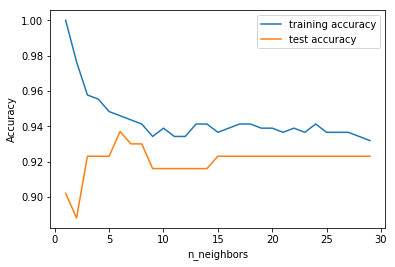

In [2]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 30
neighbors_settings = range(1, 30)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

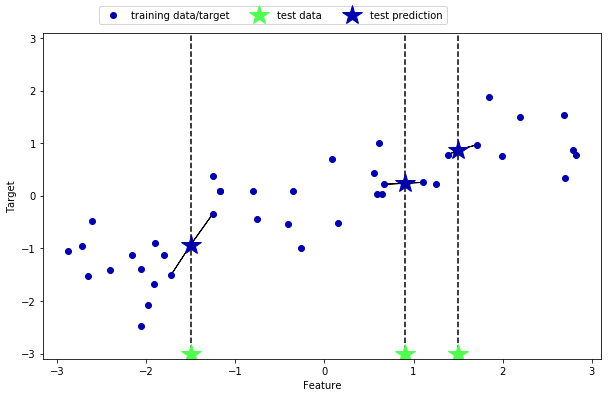

In [3]:
# K-Neighbor Regression
mglearn.plots.plot_knn_regression(n_neighbors=2)

In [4]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

print("Test set predictions:\n{}".format(reg.predict(X_test)))
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


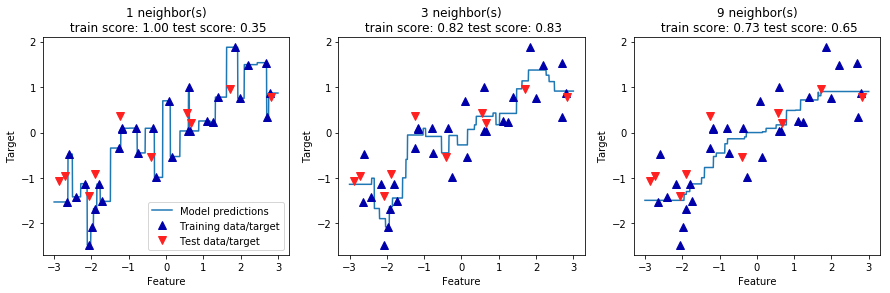

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
                            n_neighbors, reg.score(X_train, y_train),
    reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
"Test data/target"], loc="best")

w[0]: 0.393906  b: -0.031804


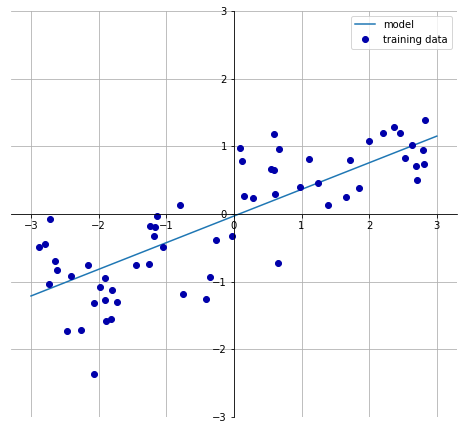

In [6]:
# Linear Regression
mglearn.plots.plot_linear_regression_wave()

Variance y_train: 0.793355333054839
Variance y_test: 1.2414047475609313
lr.coef_ (w): [0.39390555]
lr.intercept_ (b): -0.031804343026759746
Training set score: 0.67
Testing set score: 0.66


Text(0.5, 1.0, 'Linear Regression demo')

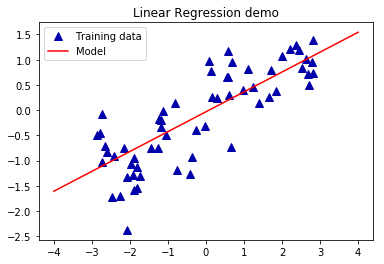

In [7]:
from sklearn.linear_model import LinearRegression
# 1 dimesional dataset
X, y = mglearn.datasets.make_wave(n_samples=60)
# Visualize dataset
plt.plot(X, y, '^', c=mglearn.cm2(0), markersize=8)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("Variance y_train:", np.var(y_train, ddof=1))
print("Variance y_test:", np.var(y_test, ddof=1))

print("lr.coef_ (w): {}".format(lr.coef_))
print("lr.intercept_ (b): {}".format(lr.intercept_))
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Testing set score: {:.2f}".format(lr.score(X_test, y_test)))

line = np.linspace(-4, 4, 10).reshape(-1, 1)
plt.plot(line, lr.predict(line), color='r')
plt.legend(('Training data', 'Model'), loc='best')
plt.title('Linear Regression demo')

In [8]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
# Variance of target
print(np.var(y_train, ddof=1))
print(np.var(y_test, ddof=1))

85.53391869442001
82.34742032245968


In [9]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


In [10]:
# Ridge Regression using l2 regularization to limited overfiting
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(ridge.coef_ != 0)))

Training set score: 0.93
Test set score: 0.77
Number of features used: 104


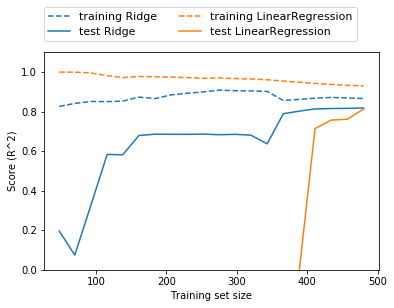

In [11]:
mglearn.plots.plot_ridge_n_samples()

In [12]:
# Lasso using L1 regularization, "Least Absolute Shrinkage and Selection Operator"
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01,  max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [13]:
# Combine between Lasso and Ridge Regression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
regr = ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=100000).fit(X_train, y_train)

print("Training set score: {:.2f}".format(regr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(regr.score(X_test, y_test)))
print("Number of features used: {}\n".format(np.sum(regr.coef_ != 0)))

Training set score: 0.86
Test set score: 0.72
Number of features used: 84



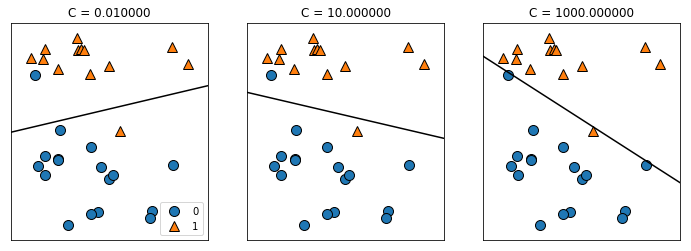

In [14]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC


mglearn.plots.plot_linear_svc_regularization()

In [15]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target,
                                                    random_state=50)
logreg = LogisticRegression(C=1000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))
# Variance of target
print(np.var(y_train, ddof=1))
print(np.var(y_test, ddof=1))

Training set score: 0.969
Test set score: 0.972
0.23448218724109365
0.23490593913129118


/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Coefficient shape:  (3, 2)
Intercept shape:  (3,)


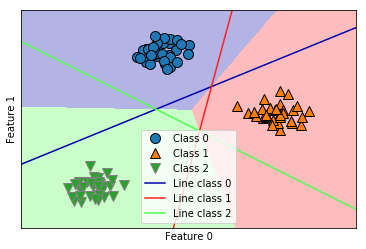

In [16]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                    mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 0)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
'Line class 2'], loc='best')
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.3)

In [17]:

# Predict
X_test=[[6, -4]]
print(linear_svm.predict(X_test))

[1]


In [18]:
# Naive Bayes
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB


iris_dataset = datasets.load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], 
                                        test_size=0.25, random_state=0, stratify = iris_dataset['target'])
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [19]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(max_depth = 4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


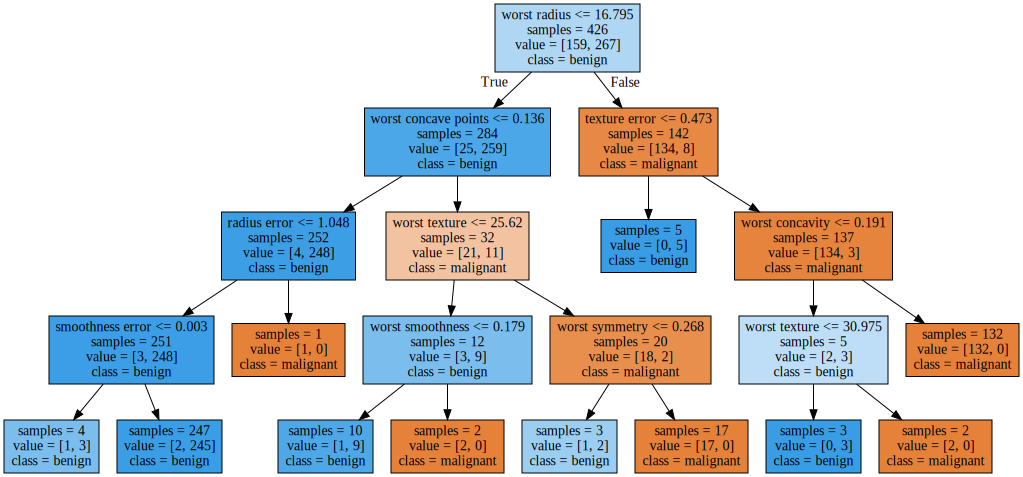

In [20]:
# Export reporting Decision tree
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                    feature_names=cancer.feature_names, impurity=False, filled=True)
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

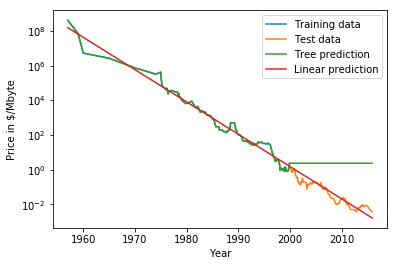

In [21]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,
                    "ram_price.csv"))
# plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

from sklearn.tree import DecisionTreeRegressor
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price[:, np.newaxis])

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
# Predict
X_all = ram_prices.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)
# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

In [22]:
# Ensembles Decision Tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=120, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.967


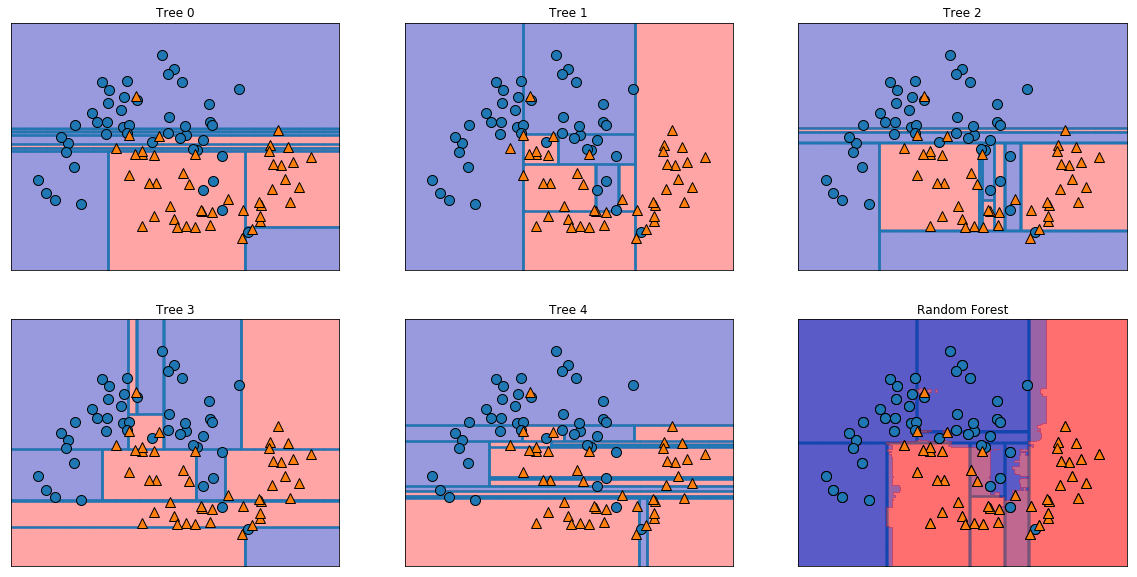

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [26]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.927
Accuracy on test set: 0.958


Text(0, 0.5, 'Feature 1')

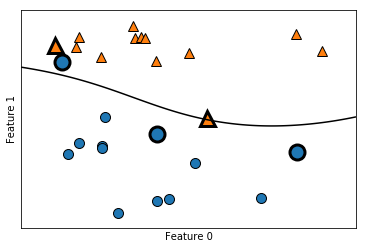

In [35]:
# Support Vector machine
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

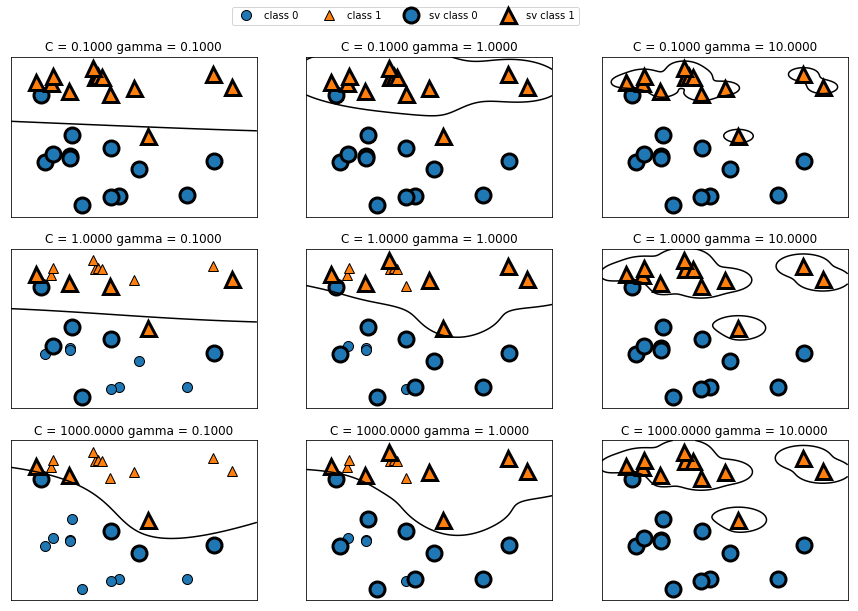

In [34]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], ncol=4, loc=(.9, 1.2))

In [37]:
# SVM for cancer dataset

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0,
                                                    stratify=cancer.target)
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.63


/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
